#Dataset PreProcessing

CIFAR 100 DataSet

In [ ]:
%rm -rf *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow import keras
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from matplotlib import pyplot
from keras import datasets

from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
from sklearn.svm import SVC

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_curve, auc

from sklearn.multiclass import OneVsOneClassifier

from scipy import interp

In [ ]:
#import data
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 17s 0us/step


In [ ]:
print("Training Images Shape (x train shape) :", train_images.shape)
print("Label of training images (y train shape) :",train_labels.shape)
print("Test Images Shape (x test shape) :",test_images.shape)
print("Label of test images (y test shape) :",test_labels.shape)

Training Images Shape (x train shape) : (50000, 32, 32, 3)
Label of training images (y train shape) : (50000, 1)
Test Images Shape (x test shape) : (10000, 32, 32, 3)
Label of test images (y test shape) : (10000, 1)


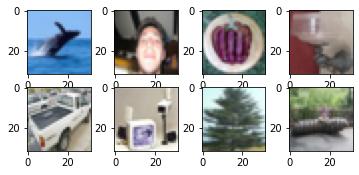

In [ ]:
# plot first few images
for i in range(8):
	# define subplot
	pyplot.subplot(340+1 + i)
	# plot raw pixel data
	pyplot.imshow(train_images[400+i])
# show the figure
pyplot.show()

In [ ]:
train_images, test_images = train_images / 255, test_images / 255

#MobileNetV2

use MobileNetV2 with 2 layer Dense  

In [ ]:
# from keras.applications.MobileNet import MobileNet
IMG_SHAPE = (32, 32, 3)
# Pre-trained model with MobileNet
base_model = keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
# Freeze the pre-trained model weights
base_model.trainable = True

for layer in base_model.layers[:100]:
  layer.trainable =  False
  
# Trainable classification head
maxpool_layer = GlobalMaxPooling2D()
avgpool_layer = GlobalAveragePooling2D()
dense_extra_1 = Dense(units=512, activation='relu')
dense_extra_2 = Dense(units=256, activation='relu')
prediction_layer = Dense(units=100, activation='softmax')
# Layer classification head with feature detector
model = Sequential([
    base_model,
    maxpool_layer,
    dense_extra_1,
    dense_extra_2,
    prediction_layer
])
num_epochs = 10
fine_tune_epochs = 30
total_epochs =  num_epochs + fine_tune_epochs

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 100)               25700     
                                                                 
Total params: 3,070,884
Trainable params: 2,674,340
Non-

# MobilnetV2 with Head ANN Classification

select between complie and Train new model or load model
if loading model skip this cell and next

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [ ]:
hist= model.fit(train_images, train_labels, epochs=40,  validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 23s 13ms/step - loss: 3.5477 - sparse_categorical_accuracy: 0.1599 - val_loss: 4.4782 - val_sparse_categorical_accuracy: 0.0831
Epoch 2/40
1563/1563 [==============================] - 22s 14ms/step - loss: 2.9580 - sparse_categorical_accuracy: 0.2573 - val_loss: 3.3889 - val_sparse_categorical_accuracy: 0.2330
Epoch 3/40
1563/1563 [==============================] - 20s 13ms/step - loss: 2.7195 - sparse_categorical_accuracy: 0.3093 - val_loss: 3.1622 - val_sparse_categorical_accuracy: 0.2571
Epoch 4/40
1563/1563 [==============================] - 22s 14ms/step - loss: 2.5618 - sparse_categorical_accuracy: 0.3378 - val_loss: 3.0119 - val_sparse_categorical_accuracy: 0.2911
Epoch 5/40
1563/1563 [==============================] - 20s 13ms/step - loss: 2.4446 - sparse_categorical_accuracy: 0.3651 - val_loss: 2.7824 - val_sparse_categorical_accuracy: 0.3340
Epoch 6/40
1563/1563 [==============================] - 22s 14ms/step - loss: 2.

itreative model traingn and save in google colab in night

In [ ]:
first_step = 65
model.save('/content/drive/MyDrive/cfarModel/model_max_{0}_epoch.h5'.format(first_step))
for cnt in range(10000):
  hist= model.fit(train_images, train_labels, epochs=cnt*10,  validation_data=(test_images, test_labels))
  ep = cnt*10 + first_step
  model.save('/content/drive/MyDrive/cfarModel/model_max_{0}_epoch.h5'.format(ep))

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7656 - sparse_categorical_accuracy: 0.7744 - val_loss: 3.4029 - val_sparse_categorical_accuracy: 0.4303
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7742 - sparse_categorical_accuracy: 0.7753 - val_loss: 3.2621 - val_sparse_categorical_accuracy: 0.4245
Epoch 3/10
 577/1563 [==========>...................] - ETA: 11s - loss: 0.6997 - sparse_categorical_accuracy: 0.7962

load model

In [ ]:
%cd /content/
%cp /content/drive/MyDrive/model_max_65_epoch.h5 /content/
from keras.saving.save import load_model
model = load_model('model_max_65_epoch.h5')

model.summary()

/content
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_1 (Dense)             (None, 512)               655872    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
Total params: 3,070,884
Trainable params: 2,6

In [ ]:
hist= model.fit(train_images, train_labels, epochs=1,  validation_data=(test_images, test_labels))

1563/1563 [==============================] - 25s 14ms/step - loss: 0.7865 - sparse_categorical_accuracy: 0.7712 - val_loss: 3.3020 - val_sparse_categorical_accuracy: 0.4275


In [ ]:
prediction = model.predict(test_images)
history_dict = hist.history
print(history_dict.keys())

313/313 [==============================] - 2s 6ms/step
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


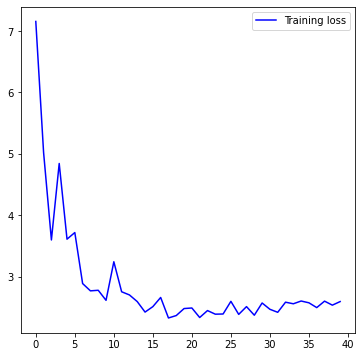

<Figure size 432x288 with 0 Axes>

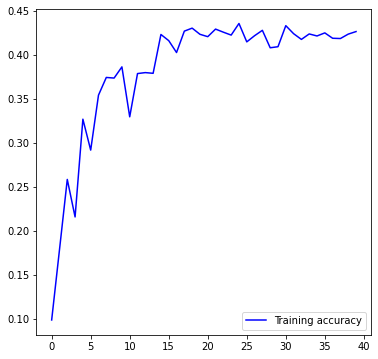

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(hist.history['sparse_categorical_accuracy'], color='b', label="Training accuracy")
plt.legend(loc = "lower right")
plt.show()


# MobilnetV2 with Head SVM Classification

In [ ]:
layer_name = 'dense_2'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224_input   [(None, 32, 32, 3)]      0         
 (InputLayer)                                                    
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_1 (Dense)             (None, 512)               655872    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                             

In [ ]:
y_train_pred = intermediate_layer_model.predict(train_images)
y_valid_pred = intermediate_layer_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

num_train = 50000
x_input = y_train_pred[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_input, y_input)

(50000, 256) (50000, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(y_valid_pred)
accuracy_score(test_labels,y_pred)

0.4279

<ipython-input-84-bd05ef19b097>:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


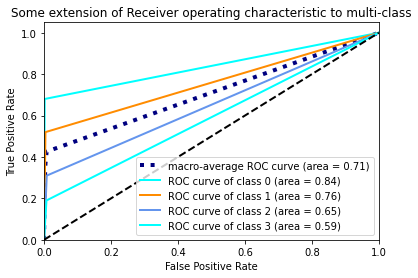

In [ ]:
from sklearn import preprocessing

n_classes = 4

y_predection = np.transpose(np.array([y_pred[:]]))
y_val = preprocessing.label_binarize(test_labels, classes=list(range(0,n_classes)))
y_score = preprocessing.label_binarize(y_predection, classes=list(range(0,n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from itertools import cycle
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# MobilnetV2 with Head DT Classification

In [ ]:
layer_name = 'dense_2'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224_input   [(None, 32, 32, 3)]      0         
 (InputLayer)                                                    
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_1 (Dense)             (None, 512)               655872    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                           

In [ ]:
y_train_pred = intermediate_layer_model.predict(train_images)
y_valid_pred = intermediate_layer_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [ ]:
from sklearn import tree

num_train = 50000
x_input = y_train_pred[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

clf = tree.DecisionTreeClassifier(max_depth=128,min_samples_split=3)
clf = clf.fit(x_input, y_input)

(50000, 256) (50000, 1)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(y_valid_pred)
accuracy_score(test_labels,y_pred)

0.3174

<ipython-input-89-d24aa42f584f>:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


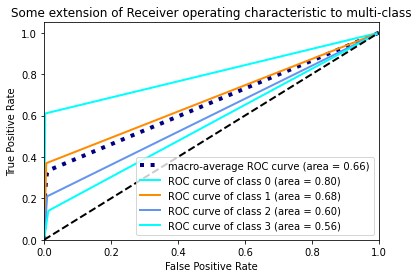

In [ ]:
from sklearn import preprocessing

n_classes = 4

y_predection = np.transpose(np.array([y_pred[:]]))
y_val = preprocessing.label_binarize(test_labels, classes=list(range(0,n_classes)))
y_score = preprocessing.label_binarize(y_predection, classes=list(range(0,n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from itertools import cycle
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# MobilnetV2 with MLP Classification

In [ ]:
layer_name = 'dense_2'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_layer_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224_input   [(None, 32, 32, 3)]      0         
 (InputLayer)                                                    
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_1 (Dense)             (None, 512)               655872    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                           

In [ ]:
y_train_pred = intermediate_layer_model.predict(train_images)
y_valid_pred = intermediate_layer_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [ ]:
from sklearn.neural_network import MLPClassifier

num_train = 50000
x_input = y_train_pred[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

clf = MLPClassifier(random_state=1, max_iter=20 ,hidden_layer_sizes=(15,128),activation="relu")
clf.fit(x_input, y_input)

(50000, 256) (50000, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(15, 128), max_iter=20, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(y_valid_pred)
accuracy_score(test_labels,y_pred)

0.4047

<ipython-input-94-d24aa42f584f>:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


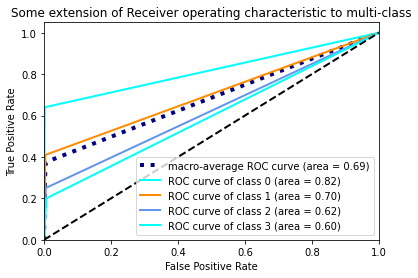

In [ ]:
from sklearn import preprocessing

n_classes = 4

y_predection = np.transpose(np.array([y_pred[:]]))
y_val = preprocessing.label_binarize(test_labels, classes=list(range(0,n_classes)))
y_score = preprocessing.label_binarize(y_predection, classes=list(range(0,n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from itertools import cycle
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# MobilnetV2 with Perceptron Classification

In [ ]:
layer_name = 'dense_2'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_layer_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224_input   [(None, 32, 32, 3)]      0         
 (InputLayer)                                                    
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_1 (Dense)             (None, 512)               655872    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                           

In [ ]:
y_train_pred = intermediate_layer_model.predict(train_images)
y_valid_pred = intermediate_layer_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [ ]:
from sklearn.linear_model import Perceptron

num_train = 50000
x_input = y_train_pred[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

clf = Perceptron(tol=1e-2, random_state=1)
clf.fit(x_input, y_input)

(50000, 256) (50000, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(random_state=1, tol=0.01)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(y_valid_pred)
accuracy_score(test_labels,y_pred)

0.4122

<ipython-input-101-d24aa42f584f>:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


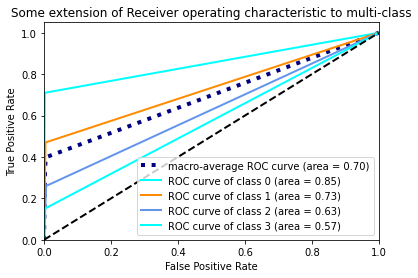

In [ ]:
from sklearn import preprocessing

n_classes = 4

y_predection = np.transpose(np.array([y_pred[:]]))
y_val = preprocessing.label_binarize(test_labels, classes=list(range(0,n_classes)))
y_score = preprocessing.label_binarize(y_predection, classes=list(range(0,n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from itertools import cycle
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()